## 3. Problem: Regression Estimator

For this problem, the dataset to be used is the diabetes dataset.

### a. Design a suitable regressor for this dataset. 

You may consider alternatives among any built-in regressors (supported by scikit-learn). Justify your final selected design, including parameter selection and performance metric used.

### Answer
When I chose a design for this dataset I considered the following
* Preprocessing: It is important to use StandardScaler because they likely have different sclaes
* Model Selection: For simple purposes I started with Linear but I would have liked to see if multicollinearity might be suspected.
  Furthermore, it can enforce feature selection through regularization using Ridge or Lasso models.
* Parameters: Arbitrarily chosen although they could be tuned using cross validation to minimize MSE
* MSE is suitable for regression and will be the main metric.

### b. Investigate the effect of the amount of training used on the regressor design. 

For this purpose, you can consider plotting the MSE (Mean Squared Error) testing performance as a function of the amount of training used. Comment on your findings.

### Answer
MSE fluctuates as test size increases. However, there is an overall decreasing trend for all models as more training data is used
* All three regression models perform comparably across the range of test sizes
* There are peaks in the MSE for intermediate test sizes which could be due to the specific split
* of data at those sizes. Could be randomness?
* A test size approaches 90, there is a significant drop in MSE. Suggesting that a larger training set significantly improves model performance

#### General Trend
For all models we had very close MSE, which could be because the dataset is linearly separable and the regularization in Ridge and Lasso isn't significantly impacting the model's performance.

Tuning alpha at 1 seems to have introduced a stronger regularization which might help with a complex amount of training data.
Other than that though changes seem to be insignificant



In [83]:
# Data handling
import numpy as np # linear algebra
import pandas as pd
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Model
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

# Import diabetes dataset
from sklearn.datasets import load_diabetes

In [84]:
# Load the diabetes dataset
diabetes = load_diabetes() # loads the diabetes dataset as a dictionary-like object

# Create a DataFrame
# feature_names: column names 
# data: data values
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Display info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [85]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [86]:
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064


In [87]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [88]:
"""
age age in years
sex
bmi body mass index
bp average blood pressure
s1 tc, total serum cholesterol
s2 ldl, low-density lipoproteins
s3 hdl, high-density lipoproteins
s4 tch, total cholesterol / HDL
s5 ltg, possibly log of serum triglycerides level
s6 glu, blood sugar level
"""
df.columns = ['age', 'sex', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']

"""
Column 11 is a quantitative measure of disease progression one year after baseline
"""
df['disease_progression'] = diabetes.target

# Display the first 5 rows
df.head()
# Display the last 5 rows
df.tail()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,disease_progression
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


# Data Preprocessing


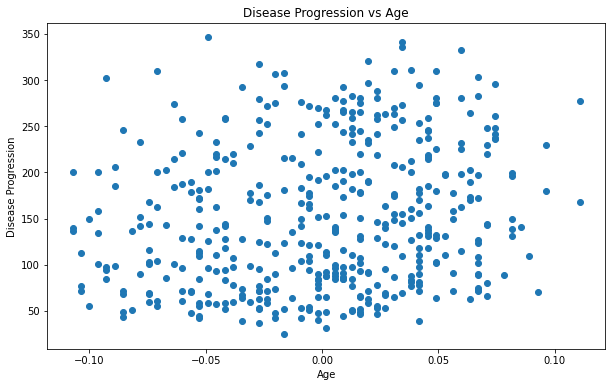

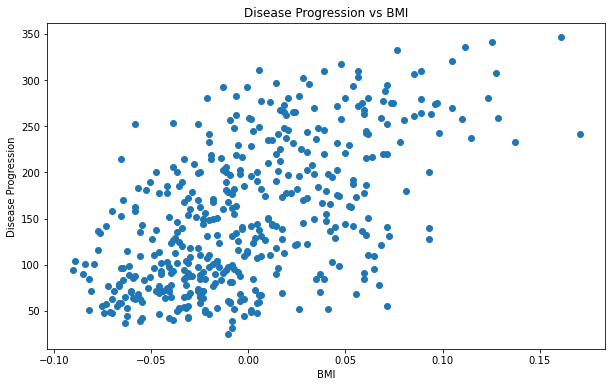

In [89]:
# Data visualization

# Plot diabetes progression vs age
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['disease_progression'])
plt.xlabel('Age')
plt.ylabel('Disease Progression')
plt.title('Disease Progression vs Age')
plt.show()

# Plot diabetes progression vs bmi
plt.figure(figsize=(10, 6))
plt.scatter(df['bmi'], df['disease_progression'])
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Disease Progression vs BMI')
plt.show()




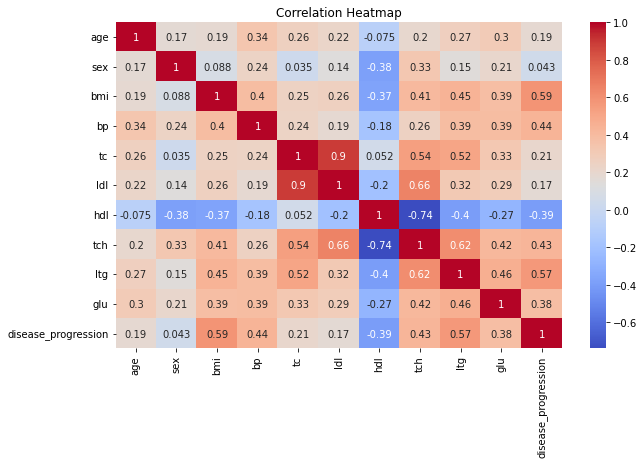

In [90]:
# Let's see correlation between the features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Linear vs Ridge vs Lasso

Linear Regression MSE: [5031.291088565677]
Ridge MSE: [5030.67530187671]
Lasso MSE: [5028.110735418637]


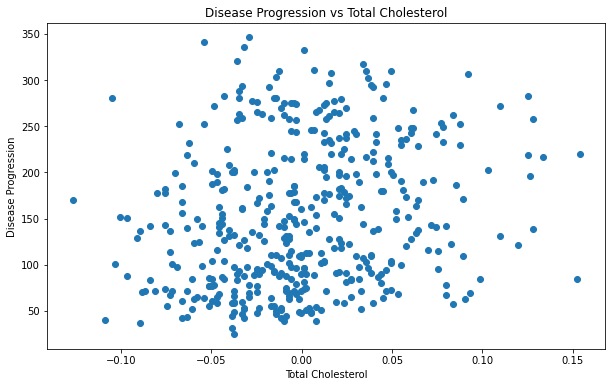

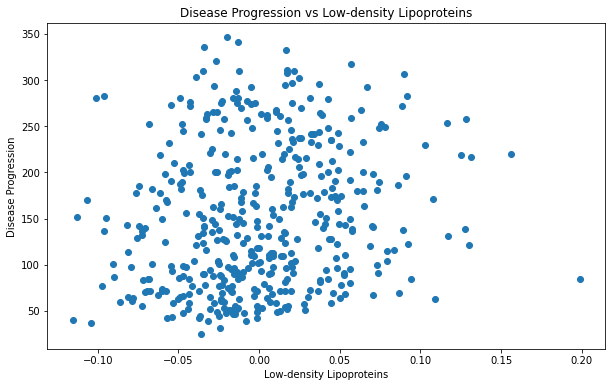

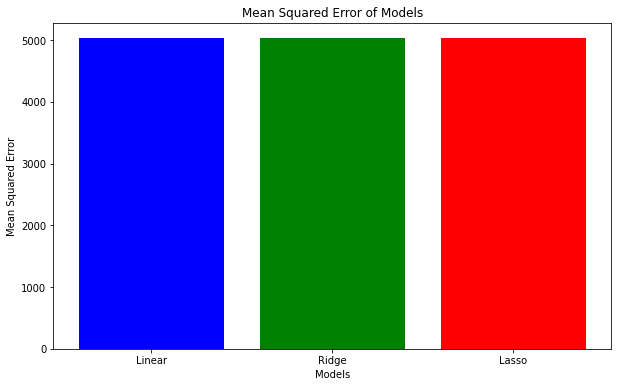

In [91]:
# our best features would be to use tc and ld
# Split the data into features and target
X = df[['tc', 'ldl']]
y = df['disease_progression']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "linear_regression": linear_model.LinearRegression(),
    "ridge": linear_model.Ridge(alpha=0.5),
    "lasso": linear_model.Lasso(alpha=0.1),
}
# Mean squared error arrays
linear_mse = []
ridge_mse = []
lasso_mse = []

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    if name == "linear_regression":
        linear_mse.append(mse)
    elif name == "ridge":
        ridge_mse.append(mse)
    else:
        lasso_mse.append(mse)

# Display the mean squared error
print("Linear Regression MSE:", linear_mse)
print("Ridge MSE:", ridge_mse)
print("Lasso MSE:", lasso_mse)

# Plot the diabetes progression vs tc
plt.figure(figsize=(10, 6))
plt.scatter(df['tc'], df['disease_progression'])
plt.xlabel('Total Cholesterol')
plt.ylabel('Disease Progression')
plt.title('Disease Progression vs Total Cholesterol')
plt.show()

# Plot the diabetes progression vs ldl
plt.figure(figsize=(10, 6))
plt.scatter(df['ldl'], df['disease_progression'])
plt.xlabel('Low-density Lipoproteins')
plt.ylabel('Disease Progression')
plt.title('Disease Progression vs Low-density Lipoproteins')
plt.show()


# Prepare data for bar plot
model_names = ['Linear', 'Ridge', 'Lasso']
mse_values = [linear_mse[0], ridge_mse[0], lasso_mse[0]]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values, color=['blue', 'green', 'red'])
plt.title("Mean Squared Error of Models")
plt.xlabel("Models")
plt.ylabel("Mean Squared Error")
plt.show()












### Again but this time keep track of test sizes


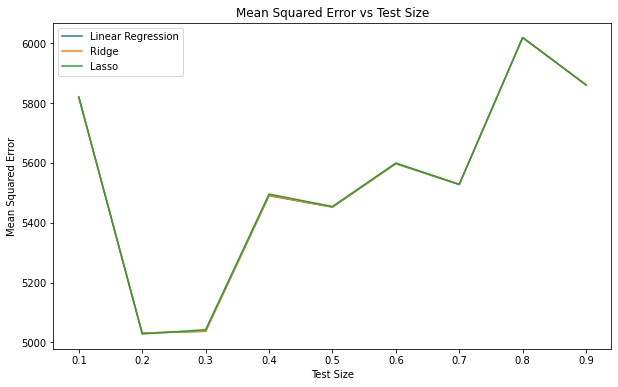

In [92]:
# Define test sizes
test_sizes = np.linspace(0.1, 0.9, 9)

# Initialize lists to store MSE for each model at different test sizes
linear_mse = []
ridge_mse = []
lasso_mse = []

# Models
models = {
    "linear_regression": linear_model.LinearRegression(),
    "ridge": linear_model.Ridge(alpha=0.5),
    "lasso": linear_model.Lasso(alpha=0.1),
}

# Loop over test sizes
for test_size in test_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the models and compute MSE
    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        mse = mean_squared_error(y_test, y_pred)
        if name == "linear_regression":
            linear_mse.append(mse)
        elif name == "ridge":
            ridge_mse.append(mse)
        else:
            lasso_mse.append(mse)

# Plot test size vs MSE
plt.figure(figsize=(10, 6))
plt.plot(test_sizes, linear_mse, label='Linear Regression')
plt.plot(test_sizes, ridge_mse, label='Ridge')
plt.plot(test_sizes, lasso_mse, label='Lasso')
plt.title("Mean Squared Error vs Test Size")
plt.xlabel("Test Size")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

# Hyper Parameter Tuning


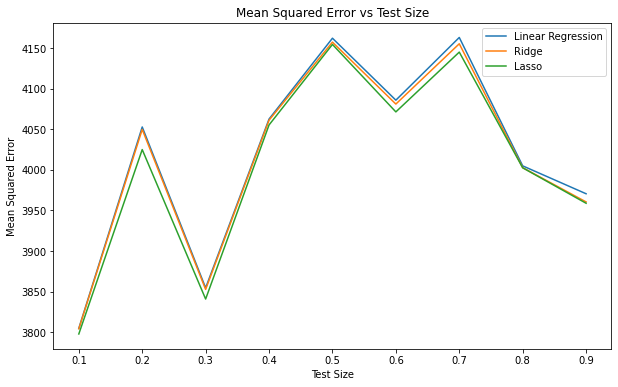

In [94]:
# Define test sizes
test_sizes = np.linspace(0.1, 0.9, 9)

# Initialize lists to store MSE for each model at different test sizes
linear_mse = []
ridge_mse = []
lasso_mse = []

# Models
models = {
    "linear_regression": linear_model.LinearRegression(),
    "ridge": linear_model.Ridge(alpha=1.0),  # Tune the alpha parameter higher for Ridge
    "lasso": linear_model.Lasso(alpha=1.0),  # Tune the alpha parameter higher for Lasso
}

# Loop over test sizes
for test_size in test_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the models and compute MSE
    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        mse = mean_squared_error(y_test, y_pred)
        if name == "linear_regression":
            linear_mse.append(mse)
        elif name == "ridge":
            ridge_mse.append(mse)
        else:
            lasso_mse.append(mse)

# Plot test size vs MSE
plt.figure(figsize=(10, 6))
plt.plot(test_sizes, linear_mse, label='Linear Regression')
plt.plot(test_sizes, ridge_mse, label='Ridge')
plt.plot(test_sizes, lasso_mse, label='Lasso')
plt.title("Mean Squared Error vs Test Size")
plt.xlabel("Test Size")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

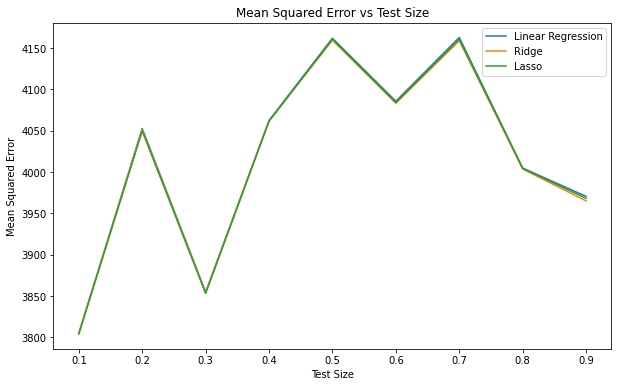

In [93]:
# Try the same as above but with bmi and age as features
X = df[['bmi', 'age']]
y = df['disease_progression']

# Define test sizes
test_sizes = np.linspace(0.1, 0.9, 9)

# Initialize lists to store MSE for each model at different test sizes
linear_mse = []
ridge_mse = []
lasso_mse = []

# Models
models = {
    "linear_regression": linear_model.LinearRegression(),
    "ridge": linear_model.Ridge(alpha=0.5),
    "lasso": linear_model.Lasso(alpha=0.1),
}

# Loop over test sizes
for test_size in test_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the models and compute MSE
    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        mse = mean_squared_error(y_test, y_pred)
        if name == "linear_regression":
            linear_mse.append(mse)
        elif name == "ridge":
            ridge_mse.append(mse)
        else:
            lasso_mse.append(mse)
        
# Plot test size vs MSE
plt.figure(figsize=(10, 6))
plt.plot(test_sizes, linear_mse, label='Linear Regression')
plt.plot(test_sizes, ridge_mse, label='Ridge')
plt.plot(test_sizes, lasso_mse, label='Lasso')
plt.title("Mean Squared Error vs Test Size")
plt.xlabel("Test Size")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

